In [2]:
# import os
# import pandas as pd
# import requests
# from tqdm import tqdm

# # ------------------------------
# # 1. Load Full Dataset
# # ------------------------------
# df = pd.read_csv("combined_comments.csv")
# df['Comment'] = df['Comment'].fillna('')

# # ------------------------------
# # 2. Groq API Config
# # ------------------------------
# API_URL = "https://api.groq.com/openai/v1/chat/completions"
# API_KEY = "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"

# headers = {"Authorization": f"Bearer {API_KEY}", "Content-Type": "application/json"}

# # ------------------------------
# # 3. Summarize All Comments
# # ------------------------------
# summaries = []
# char_counts_before = []
# char_counts_after = []

# for comment in tqdm(df['Comment'], desc="Summarizing All Comments"):
#     text = comment.strip()
#     if not text:
#         summaries.append("")
#         char_counts_before.append(0)
#         char_counts_after.append(0)
#         continue

#     # Truncate if text is too long
#     max_len = 1000
#     if len(text) > max_len:
#         text = text[:max_len] + " …"

#     payload = {
#         "model": "llama-3.3-70b-versatile",  # ✅ stable Groq model
#         "messages": [
#             {"role": "system", "content": "You are a helpful assistant that summarizes user comments in 1-2 sentences."},
#             {"role": "user", "content": f"Summarize this comment:\n{text}"}
#         ],
#         "temperature": 0.3,
#         "max_completion_tokens": 200
#     }

#     try:
#         response = requests.post(API_URL, headers=headers, json=payload)
#         response.raise_for_status()
#         res_json = response.json()
#         summary = res_json['choices'][0]['message']['content']
#     except Exception as e:
#         summary = f"Error: {e}"

#     summaries.append(summary)
#     char_counts_before.append(len(text))
#     char_counts_after.append(len(summary))

# # ------------------------------
# # 4. Save Results
# # ------------------------------
# df['Original_Length'] = char_counts_before
# df['Comment_Summary'] = summaries
# df['Summary_Length'] = char_counts_after

# df.to_csv("comment_summaries_full.csv", index=False)

# print("✅ Full summarization completed. Results saved in comment_summaries_full.csv")

# # ------------------------------
# # 5. Compression Stats
# # ------------------------------
# total_before = sum(char_counts_before)
# total_after = sum(char_counts_after)
# compression_ratio = (1 - (total_after / total_before)) * 100 if total_before > 0 else 0

# print(f"\n📊 Dataset Stats:")
# print(f"Total characters before summarization: {total_before}")
# print(f"Total characters after summarization: {total_after}")
# print(f"Average reduction: {compression_ratio:.2f}%")


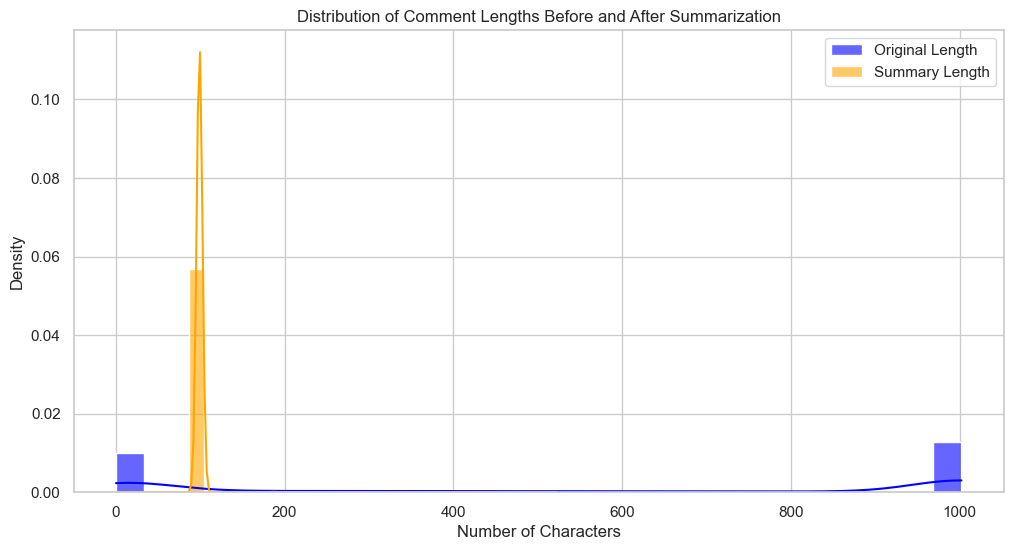

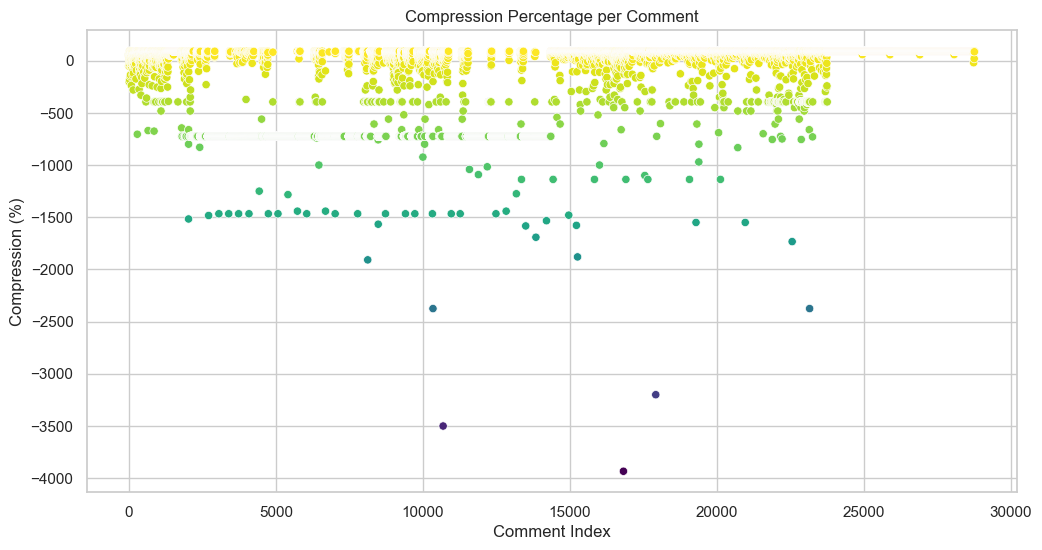

📊 Summary Statistics:
        Original_Length  Summary_Length  Compression_%
count     28756.000000    28756.000000   28754.000000
mean        540.782654      101.674572    -184.127062
std         448.771964       26.898192     378.777950
min           0.000000        0.000000   -3933.333333
25%          12.000000       99.000000    -725.000000
50%         605.000000       99.000000      82.960413
75%        1002.000000       99.000000      90.119760
max        1002.000000      522.000000      90.119760


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your summarized data
df = pd.read_csv("comment_summaries_full.csv")

# Set style
sns.set(style="whitegrid")

# 1️⃣ Histogram of Original vs Summarized Comment Lengths
plt.figure(figsize=(12,6))
sns.histplot(df['Original_Length'], color='blue', label='Original Length', kde=True, stat="density", bins=30, alpha=0.6)
sns.histplot(df['Summary_Length'], color='orange', label='Summary Length', kde=True, stat="density", bins=30, alpha=0.6)
plt.title('Distribution of Comment Lengths Before and After Summarization')
plt.xlabel('Number of Characters')
plt.ylabel('Density')
plt.legend()
plt.show()

# 2️⃣ Scatter plot showing compression per comment
df['Compression_%'] = (1 - df['Summary_Length'] / df['Original_Length']) * 100

plt.figure(figsize=(12,6))
sns.scatterplot(x=range(len(df)), y='Compression_%', data=df, hue='Compression_%', palette='viridis', legend=False)
plt.title('Compression Percentage per Comment')
plt.xlabel('Comment Index')
plt.ylabel('Compression (%)')
plt.show()

# 3️⃣ Summary statistics table
summary_stats = df[['Original_Length', 'Summary_Length', 'Compression_%']].describe()
print("📊 Summary Statistics:\n", summary_stats)
